# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
np.random.seed(3)

In [18]:
# sampling from multivariate normal distribution and from Bernoulli
n = 1000
x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), n)
y = np.random.binomial(1, 0.5, n)
# x, y

In [19]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [20]:
# sampling
Y_generative = np.concatenate([np.ones(n // 2), np.zeros(n // 2)])
X_generative = np.concatenate([
    np.random.multivariate_normal(m1, sigma, n // 2),
    np.random.multivariate_normal(m2, sigma, n // 2)])

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


We begin with using the Bayes theorem and using the law of total probability

$$ p(y = 1|x) = \frac{p(x| y = 1)p(y = 1)}{p(x)} = \frac{p(x| y = 1)p(y = 1)}{p(x| y = 1)p(y = 1) + p(x| y = -1)p(y = -1)}$$

After further derivations (in the notes), we obtain that

$$\beta_0 = \log \frac{1-\pi}{\pi} + \frac{1}{2} \mu_2^T \Sigma^{-1} \mu_2 - \frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1,$$ 

$$\beta = \Sigma^{-1} \cdot (\mu_1 - \mu_2).$$

Hence, it is a logistic model

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [21]:
# computing beta_0 and beta using the formulas
sigma_inverse = np.linalg.inv(sigma)
pi_prob = 0.5

beta_interc = np.log((1 - pi_prob) / pi_prob) + \
    0.5 * m2 @ sigma_inverse @ m2 - 0.5 * m1 @ sigma_inverse @ m1
beta_coefs = sigma_inverse @ (m1 - m2)

In [22]:
beta_interc, beta_coefs

(-2.0, array([2., 2.]))

In [23]:
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.0439725]), array([[2.15496105, 2.21123368]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [24]:
# sampling
n = 1000
x_1 = np.random.multivariate_normal(m1, sigma, n)
x_2 = np.random.multivariate_normal(m2, sigma, n)
idx = np.random.binomial(1, 0.5, n)[:, None]
X_disciminative = idx * x_1 + (1 - idx) * x_2
beta_coefs = np.array([2, 2])
beta_interc = -2
success_rate = 1 / (1 + np.exp(-beta_interc - beta_coefs @ X_disciminative.T))
Y_discriminative = np.random.binomial(1, success_rate, n)

In [25]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)

LogisticRegression(penalty=None)

In [26]:
mod_b.coef_, mod_b.intercept_

(array([[1.99105367, 1.85601771]]), array([-1.82230791]))

#### Second bullet point

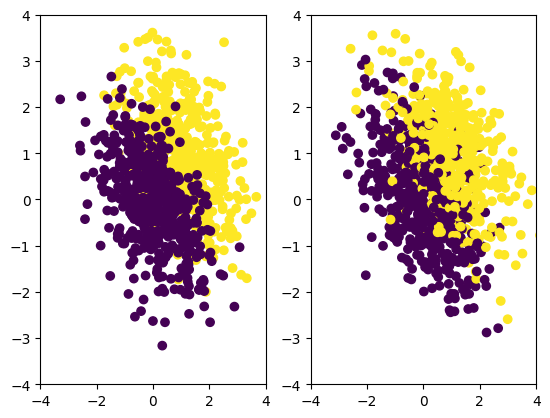

In [27]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c = Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_disciminative[:, 0], X_disciminative[:, 1], c = Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

Nothing really, they are equivalent. These are just two different points of view of the same thing.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

Once again we begin with Bayes theorem and law of total probability.

$$ p(y = 1|x) = \frac{p(x| y = 1)p(y = 1)}{p(x)} = \frac{p(x| y = 1)p(y = 1)}{p(x| y = 1)p(y = 1) + p(x| y = -1)p(y = -1)}$$

Further deriving in the notes, we obtain that

$$p(x|y=-1) = \frac{\exp(-\beta_0)}{2} \cdot \exp(-2x).$$

This means that $f_{X\mid Y=-1}$ is an exponential distribution with parameter $\lambda = 2$. Using the fact that the probability density function always integrates to 1, we obtain

$$\frac{\exp(-\beta_0)}{2} = 2$$

which means that $\beta_0$ is uniquely determined: $\beta_0 = -\log(4)$

For an arbitrary value of $\pi$, we can further derive that

$$ \beta_0 = -\log( (\beta_1 + 1) \frac{1-\pi}{\pi}).$$

In [28]:
# sampling

beta_1 = 1
lambda_1 = 1
lambda_2 = beta_1 + 1

n1 = 1000
x1 = np.random.exponential(1 / lambda_1, size = n1)

n2 = 2000
x2 = np.random.exponential(1 / lambda_2, size = n2)

In [29]:
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.repeat(1, n1), np.repeat(-1, n2)])

In [30]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)

LogisticRegression(penalty=None)

In [31]:
mod.intercept_, mod.coef_

(array([-1.34313073]), array([[0.94083135]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

We have shown that $f_{X\mid Y=-1}$ is an exponential distribution with $\lambda=2$. For a fixed $\pi$, the intercept is unique and cannot be chosen freely, since it is a determinic function of $\pi$.

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

As above, $\beta_0 = - \log{4}$

In [32]:
beta1 = 1
pi_c = n1 / (n1 + n2)
beta0 = - np.log((beta1 + 1) * (1 - pi_c) / pi_c)
beta0, - np.log(4)

(-1.3862943611198908, -1.3862943611198906)

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [13]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [14]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [15]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [16]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [17]:
# excess risk
# ...

In [18]:
# simulations with fixed sample size

In [19]:
# simulations for various sample sizes

In [20]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)